In [2]:
import pandas as pd
import glob 
import os
import numpy as np

In [9]:
stocks = pd.read_csv("all_feats.csv")
stocks

,time_id,wap_mean_300,wap_std_300,wap2_mean_300,wap2_std_300,log_returns_realized_volatility_300,log_returns_weighted_volatility_300,log_returns_quarticity_300,log_returns_mean_300,log_returns_std_300,...,bid_ask_spread1_std_150,bid_ask_spread2_mean_150,bid_ask_spread2_std_150,bid_ask_spread3_mean_150,bid_ask_spread3_std_150,ofi_mean_150,ofi_std_150,stock_id,target_mean_enc,beta
0,5,1.003597,0.000851,1.003512,0.001014,0.003394,0.000196,4.521321e-10,7.138250e-06,0.000196,...,0.000178,0.001210,0.000205,0.000287,0.000164,12.646667,79.839784,0,0.002943,1.208072
1,11,0.999987,0.000156,0.999983,0.000182,0.000699,0.000040,2.123766e-12,8.823633e-07,0.000040,...,0.000090,0.000577,0.000130,0.000228,0.000090,0.680000,14.913766,0,0.002974,1.719756
2,16,0.999960,0.000444,1.000110,0.000470,0.001983,0.000115,1.070617e-10,1.729093e-06,0.000115,...,0.000147,0.001063,0.000226,0.000414,0.000187,-3.873333,73.061461,0,0.002985,7.164047
3,31,0.999219,0.000846,0.998835,0.000762,0.001863,0.000108,1.551546e-10,-5.516464e-06,0.000108,...,0.000204,0.001365,0.000316,0.000260,0.000190,-4.780000,47.926520,0,0.002974,6.559597
4,62,0.999769,0.000238,0.999684,0.000335,0.001131,0.000065,3.550845e-11,-2.164288e-06,0.000065,...,0.000115,0.000579,0.000215,0.000253,0.000161,1.920000,54.132019,0,0.002974,0.680616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428927,32751,0.999751,0.000534,0.999942,0.000673,0.002284,0.000132,2.117007e-10,-2.858852e-06,0.000132,...,0.000223,0.001238,0.000213,0.000354,0.000208,3.166667,98.108105,126,0.003887,0.895436
428928,32753,1.001470,0.000507,1.001513,0.000567,0.002217,0.000128,9.484441e-11,3.674218e-06,0.000128,...,0.000189,0.000922,0.000149,0.000187,0.000134,4.560000,39.112723,126,0.003887,-1.346971
428929,32758,1.000656,0.000319,1.000586,0.000396,0.001386,0.000080,3.031629e-11,-2.437732e-06,0.000080,...,0.000193,0.001094,0.000198,0.000250,0.000086,2.626667,51.226900,126,0.003904,0.904714
428930,32763,1.001787,0.000449,1.001794,0.000494,0.002783,0.000161,1.960849e-10,6.737309e-06,0.000161,...,0.000127,0.000847,0.000172,0.000301,0.000132,-14.680000,120.096456,126,0.003904,-0.099107


In [10]:
len(stocks.time_id.unique())

3830

array([[<AxesSubplot:title={'center':'wap_mean_300'}>,
        <AxesSubplot:title={'center':'wap_std_300'}>,
        <AxesSubplot:title={'center':'wap2_mean_300'}>,
        <AxesSubplot:title={'center':'wap2_std_300'}>,
        <AxesSubplot:title={'center':'log_returns_realized_volatility_300'}>,
        <AxesSubplot:title={'center':'log_returns_weighted_volatility_300'}>,
        <AxesSubplot:title={'center':'log_returns_quarticity_300'}>,
        <AxesSubplot:title={'center':'log_returns_mean_300'}>,
        <AxesSubplot:title={'center':'log_returns_std_300'}>],
       [<AxesSubplot:title={'center':'log_returns2_realized_volatility_300'}>,
        <AxesSubplot:title={'center':'log_returns2_weighted_volatility_300'}>,
        <AxesSubplot:title={'center':'log_returns2_quarticity_300'}>,
        <AxesSubplot:title={'center':'log_returns2_mean_300'}>,
        <AxesSubplot:title={'center':'log_returns2_std_300'}>,
        <AxesSubplot:title={'center':'wap_diff_mean_300'}>,
        <AxesS

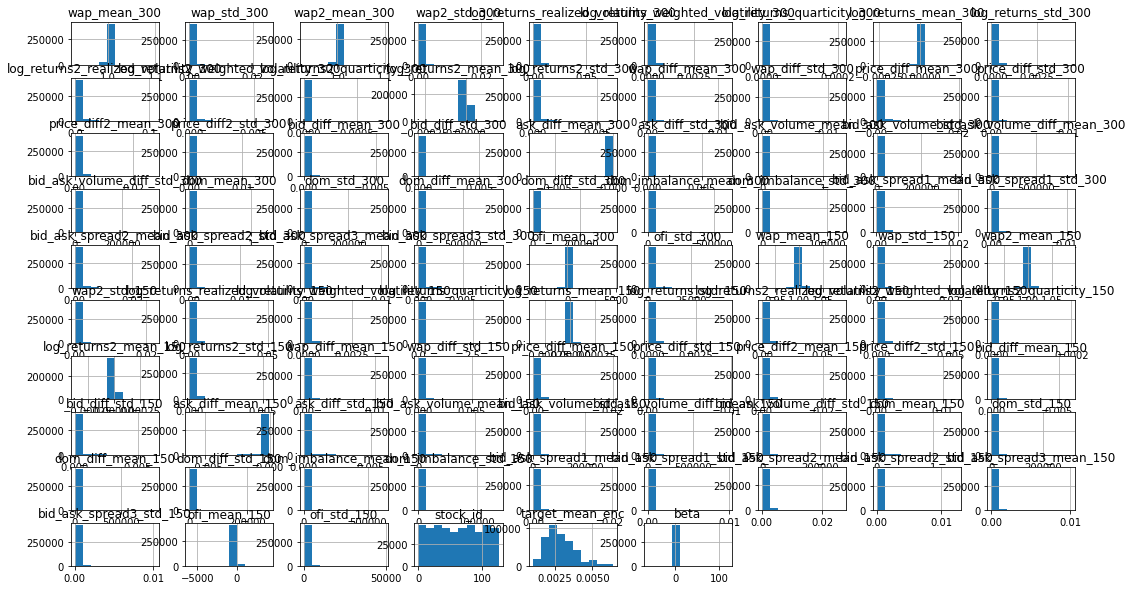

In [21]:
stocks.iloc[:,1:88].hist(figsize = (18,10))

In [26]:
#s[s['stock_id'] == 31]

s = stocks.drop(['stock_id'], axis=1)

In [10]:
df = pd.concat([s.iloc[:,1:2], s.iloc[:,5:6], s.iloc[:,7:8]], axis=1)
df

,mean_beta,mean_spread,mean_ldom
0,0.906933,0.001025,5.969193
1,1.495206,0.000709,6.300076
2,0.385722,0.000260,6.726766
3,1.816914,0.001074,6.252700
4,0.723135,0.000910,5.878605
...,...,...,...
107,1.320618,0.000627,6.393191
108,0.835223,0.000230,7.393381
109,1.644451,0.000205,8.289575
110,0.494871,0.000229,8.052474


In [23]:
stocks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time_id,428932.0,16038.972721,9365.103706,5.000000e+00,7854.000000,15853.000000,23994.000000,32767.000000
wap_mean_300,428932.0,1.000010,0.003007,9.292497e-01,0.999016,1.000015,1.000994,1.099041
wap_std_300,428932.0,0.000825,0.000808,2.185033e-06,0.000368,0.000591,0.000988,0.025238
wap2_mean_300,428932.0,1.000009,0.003012,9.292294e-01,0.999011,1.000015,1.000999,1.098704
wap2_std_300,428932.0,0.000872,0.000830,5.662432e-07,0.000402,0.000632,0.001041,0.025577
...,...,...,...,...,...,...,...,...
ofi_mean_150,428932.0,0.486413,104.517632,-5.975440e+03,-8.500000,0.206667,9.180000,4074.440000
ofi_std_150,428932.0,427.643661,1337.359007,0.000000e+00,80.999820,136.639945,276.728649,48734.991688
stock_id,428932.0,62.437944,37.126450,0.000000e+00,30.000000,63.000000,96.000000,126.000000
target_mean_enc,428932.0,0.002854,0.000958,1.034064e-03,0.002140,0.002695,0.003375,0.006380


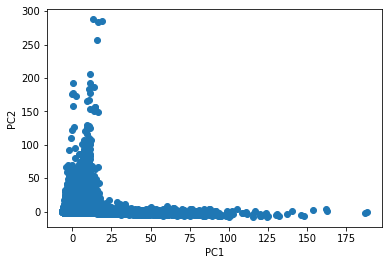

<Figure size 1296x1152 with 0 Axes>

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()

X_norm = scaler.fit_transform(stocks)

# PCA with 2 components for graphing
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_norm)

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.figure(figsize=(18,16))
plt.show()

In [146]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

x = stocks.loc[:, stocks.columns!='stock_id']
x_scaled = preprocessing.scale(x)

pca = PCA()
xpca = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(xpca)


pca_df

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0.564268,-1.025699,-2.372439,0.035215,-0.652530,0.789978,0.315939,0.568813,0.017636,-0.621545,...,0.000110,0.000019,9.213858e-15,6.763112e-14,-2.763934e-13,-3.223687e-14,-1.237677e-13,6.276870e-15,-3.449235e-14,-1.332958e-15
1,-3.292344,-0.821586,-0.258207,-1.468309,0.227927,0.000057,0.893236,-0.014490,-0.090950,0.181873,...,-0.000042,-0.000019,-1.448105e-13,1.499230e-13,7.842307e-14,-1.162198e-13,-8.396690e-14,-2.200209e-14,-1.191480e-15,5.183422e-16
2,-0.384786,-0.676736,0.128273,-0.975869,-0.285239,0.219067,0.289862,-0.074279,0.137958,0.149402,...,0.000071,0.000041,5.559413e-13,1.744654e-13,-1.550710e-13,-6.805036e-14,-5.432283e-14,-2.103066e-13,-6.578525e-14,-1.146502e-14
3,-0.215830,-1.006379,1.040398,-1.308210,-0.207757,0.045668,1.223971,0.369660,0.106170,-0.359194,...,-0.000018,-0.000063,1.790086e-13,3.978981e-14,-4.624655e-14,-2.792623e-13,1.218781e-13,-1.160443e-13,1.413775e-14,1.111710e-15
4,-2.779529,-0.872545,0.085523,-1.080357,0.154879,0.042321,0.703962,0.013528,-0.004500,0.323573,...,0.000078,-0.000015,-2.650290e-14,2.888841e-13,-1.275161e-13,3.517285e-14,1.580350e-13,-6.791604e-14,-4.917767e-13,-6.973552e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428927,0.678323,-0.877352,0.439027,-0.860331,-0.492322,0.163043,0.764245,0.301933,0.228136,-0.726989,...,-0.000051,-0.000027,9.163696e-14,-9.212939e-14,-1.894098e-14,-8.272704e-14,-2.628817e-14,-1.275990e-13,-3.597201e-16,-3.141329e-17
428928,-0.884730,-1.133745,-1.401029,-0.120941,-0.177235,-0.069769,0.820434,0.609537,-0.303605,-0.852450,...,-0.000203,-0.000067,8.312053e-14,7.551470e-14,3.291184e-13,8.943116e-14,1.277479e-13,-5.515569e-14,-2.106964e-16,-6.720878e-17
428929,-1.507966,-0.884876,-0.350306,-1.276785,-0.252382,0.177293,1.113452,0.348964,0.023337,-0.815182,...,-0.000047,-0.000033,-1.776951e-13,-1.004429e-13,3.319565e-14,1.314969e-14,1.590028e-13,7.636862e-14,1.431997e-16,1.401694e-17
428930,-0.968354,-0.910408,-1.368909,-0.088276,-0.347684,0.373417,0.302475,0.339726,-0.270698,-0.485744,...,-0.000022,0.000006,1.795224e-13,4.290777e-14,-2.100542e-13,3.132853e-14,1.314313e-14,-4.916321e-14,-1.904189e-16,2.750482e-17


In [84]:
pca_85 = PCA(.87)
pca_85.fit_transform(x_scaled)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),"% of variance explained by",pca_85.n_components_,"components.")

87.4 % of variance explained by 10 components.


In [75]:
pca_df['stock_id'] = stocks['stock_id']

pca.explained_variance_ratio_[:2]  # approx 65% in first 2PC

array([0.42952582, 0.22163054])

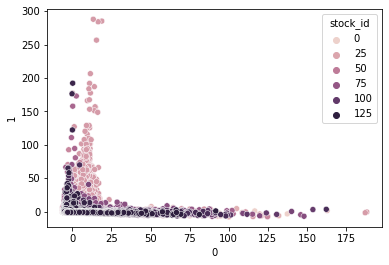

In [76]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],hue='stock_id',data=pca_df,legend=True)
plt.show()

In [86]:
df = pca_df.loc[:,:9]
df['stock_id'] = stocks['stock_id']

In [236]:
np.log(df.groupby(['stock_id'])[1].std())

stock_id
0     -1.108291
1     -1.178893
2     -0.711219
3     -0.748755
4     -1.147309
         ...   
122   -1.061613
123   -0.189567
124    0.854218
125    0.008533
126   -1.058105
Name: 1, Length: 112, dtype: float64

In [268]:
np.log(df.groupby(['stock_id'])[1].mean()).isna()[10:12]

stock_id
10    True
11    True
Name: 1, dtype: bool

array([[<AxesSubplot:title={'center':'PC1mean'}>,
        <AxesSubplot:title={'center':'PC1std'}>,
        <AxesSubplot:title={'center':'PC2mean'}>,
        <AxesSubplot:title={'center':'PC2std'}>],
       [<AxesSubplot:title={'center':'PC3mean'}>,
        <AxesSubplot:title={'center':'PC3std'}>,
        <AxesSubplot:title={'center':'PC4mean'}>,
        <AxesSubplot:title={'center':'PC4std'}>],
       [<AxesSubplot:title={'center':'PC5mean'}>,
        <AxesSubplot:title={'center':'PC5std'}>,
        <AxesSubplot:title={'center':'PC6mean'}>,
        <AxesSubplot:title={'center':'PC6std'}>],
       [<AxesSubplot:title={'center':'PC7mean'}>,
        <AxesSubplot:title={'center':'PC7std'}>,
        <AxesSubplot:title={'center':'PC8mean'}>,
        <AxesSubplot:title={'center':'PC8std'}>],
       [<AxesSubplot:title={'center':'PC9mean'}>,
        <AxesSubplot:title={'center':'PC9std'}>,
        <AxesSubplot:title={'center':'PC10mean'}>,
        <AxesSubplot:title={'center':'PC10std'}>]], dt

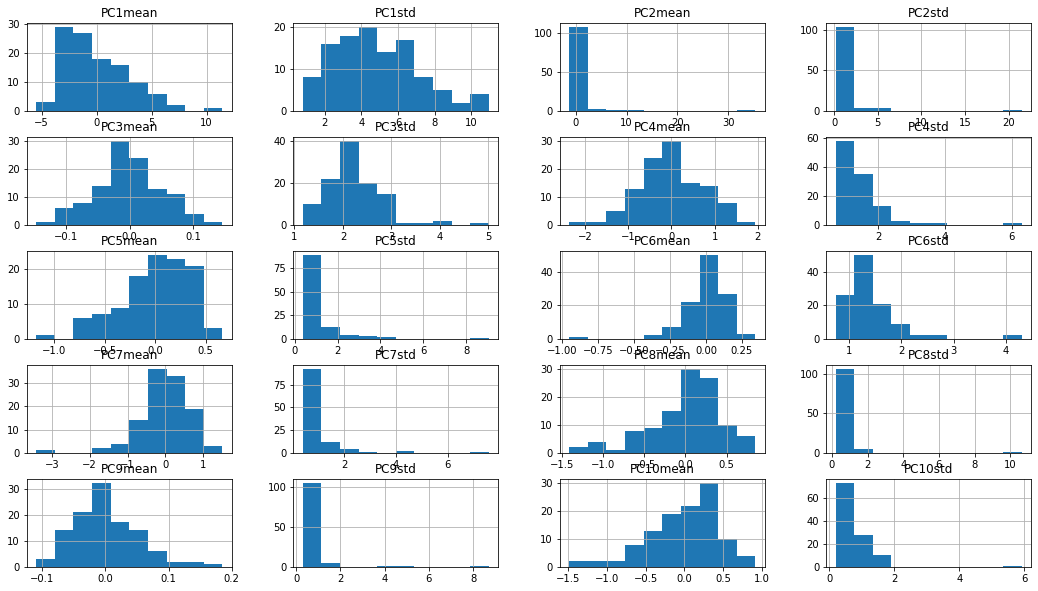

In [311]:
feats = pd.DataFrame({
    "PC1mean": df.groupby(['stock_id'])[0].mean(),
    "PC1std": df.groupby(['stock_id'])[0].std(),
    
    "PC2mean": df.groupby(['stock_id'])[1].mean(),
    "PC2std": df.groupby(['stock_id'])[1].std(),

    "PC3mean": df.groupby(['stock_id'])[2].mean(),
    "PC3std": df.groupby(['stock_id'])[2].std(),

    "PC4mean": df.groupby(['stock_id'])[3].mean(),
    "PC4std": df.groupby(['stock_id'])[3].std(),

    "PC5mean": df.groupby(['stock_id'])[4].mean(),
    "PC5std": df.groupby(['stock_id'])[4].std(),

    "PC6mean": df.groupby(['stock_id'])[5].mean(),
    "PC6std": df.groupby(['stock_id'])[5].std(),

    "PC7mean": df.groupby(['stock_id'])[6].mean(),
    "PC7std": df.groupby(['stock_id'])[6].std(),

    "PC8mean": df.groupby(['stock_id'])[7].mean(),
    "PC8std": df.groupby(['stock_id'])[7].std(),

    "PC9mean": df.groupby(['stock_id'])[8].mean(),
    "PC9std": df.groupby(['stock_id'])[8].std(),

    "PC10mean":df.groupby(['stock_id'])[9].mean(),
    "PC10std":df.groupby(['stock_id'])[9].std(),

})

feats = feats.reset_index(drop=True)
feats.hist(figsize = (18,10))

In [312]:
feats.isnull().values.any()

False

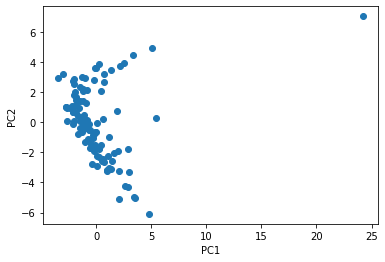

In [313]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(feats)

# PCA with 2 components for graphing
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_norm)

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## K-Means

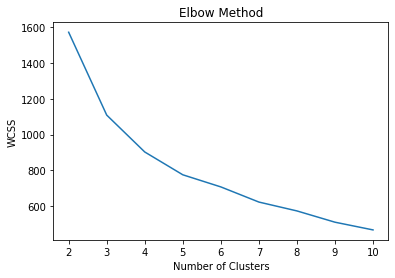

In [314]:
from sklearn.cluster import KMeans

# K-means clustering with unknown number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Estimated number of clusters: 5


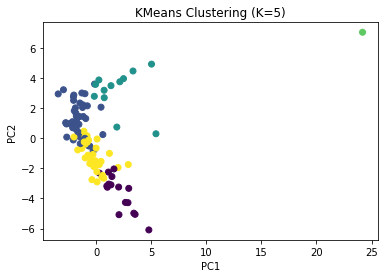

In [335]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(X_norm)
kmeans_clusters = kmeans.labels_

num_clusters = len(set(kmeans.labels_))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c = kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering (K={num_clusters})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [337]:
feats['kmeans5']=kmeans_clusters

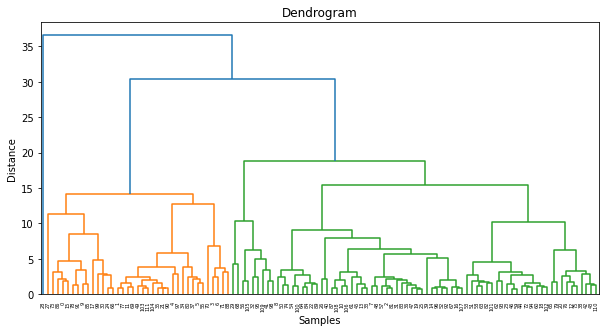

In [316]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical clustering
Z = linkage(X_norm, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Estimated number of clusters: 10


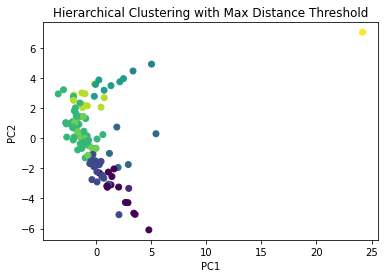

In [339]:
# Estimate number of clusters
max_d = 10 # Maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering with Max Distance Threshold')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [340]:
feats['agg_ward10']=clusters

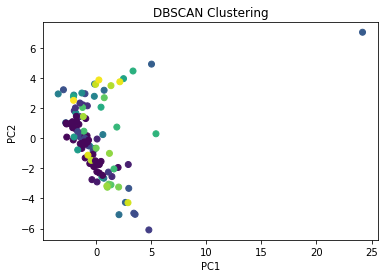

In [342]:
from sklearn.cluster import DBSCAN

# Density-based clustering with DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=1)
labels = dbscan.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [320]:
len(set(labels))

61

In [343]:
feats['dbscan61']=labels

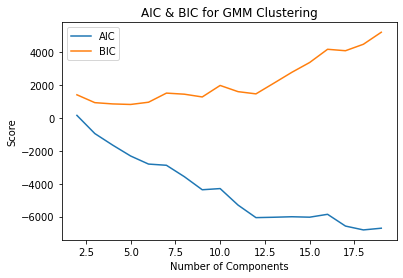

In [326]:
from sklearn.mixture import GaussianMixture

# GMM clustering with AIC and BIC
n_components = np.arange(2, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=1).fit(X_norm) for n in n_components]
plt.plot(n_components, [m.aic(X_norm) for m in models], label='AIC')
plt.plot(n_components, [m.bic(X_norm) for m in models], label='BIC')

plt.title('AIC & BIC for GMM Clustering')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc = 'best')

plt.show()

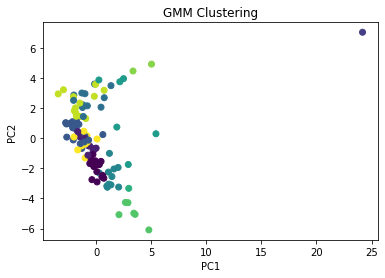

In [345]:
# GMM clustering with optimal number of clusters
gmm = GaussianMixture(n_components=12, covariance_type='full', random_state=1)
labels = gmm.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('GMM Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [346]:
labels

array([ 5,  0,  3,  5,  0,  0,  6,  3, 11,  5, 10,  0,  4, 10,  3,  5,  3,
        8,  1,  3,  4,  0, 11,  3,  8,  3, 10,  7,  2,  9,  8,  3, 10, 10,
        8,  0,  3,  0,  4,  3, 10, 10,  4,  4,  1, 10,  3,  3,  3,  0, 11,
        1,  3,  1, 11,  0,  6,  3,  1,  3,  1, 10,  1,  1, 11,  4,  8,  3,
        9,  0,  6,  6,  1,  5, 11,  4,  4,  0,  5,  4,  5,  3,  1,  3, 11,
        5,  5, 10,  5, 11,  0,  5,  3,  4,  1,  4,  3,  0, 10,  8, 11,  1,
        1,  0,  0,  6, 10,  3, 10,  6,  4,  0], dtype=int64)

In [347]:
feats['gmm12'] = labels

In [354]:
feats['stock_id'] = pd.read_csv("all_times.csv")['stock_id'].unique()

In [355]:
feats.loc[:]

,PC1mean,PC1std,PC2mean,PC2std,PC3mean,PC3std,PC4mean,PC4std,PC5mean,PC5std,...,PC8std,PC9mean,PC9std,PC10mean,PC10std,kmeans5,agg_ward10,dbscan61,gmm12,stock_id
0,1.926880,7.731338,-0.912328,0.330123,-0.081076,2.160359,-0.881705,1.262773,-0.227120,1.454408,...,0.587145,0.008252,0.507911,-0.186891,1.040775,0,1,0,5,0
1,0.326903,5.047129,-0.834477,0.307619,0.001292,2.453439,0.242317,1.285364,-0.089376,1.064685,...,0.545203,-0.027932,0.537898,-0.113119,0.721671,4,3,1,0,1
2,-3.172579,4.282420,-0.662536,0.491045,-0.001640,1.513820,0.134129,0.823022,0.384886,0.619661,...,0.374154,-0.008914,0.331713,0.365990,0.504189,1,7,1,3,2
3,4.460277,6.537792,-0.926016,0.472955,0.020212,3.396232,0.162775,1.956140,-0.507236,1.010324,...,0.728282,-0.025539,0.818249,-0.166649,0.859982,4,4,2,5,3
4,0.926025,6.622836,-1.134424,0.317490,-0.104070,1.957079,-0.266973,0.972244,-0.130319,1.741749,...,0.499351,-0.075924,0.454580,-0.471562,0.776575,4,3,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-0.377406,5.077747,-0.735383,0.345897,0.027592,2.281243,0.002699,1.089838,0.000175,0.728784,...,0.484759,-0.008169,0.480503,0.078251,0.571289,4,7,1,3,122
108,-3.353453,2.588538,-0.275376,0.827317,0.052513,1.773799,0.535257,1.291665,0.390828,0.550772,...,0.332381,0.012707,0.447072,0.258004,0.316010,1,7,9,10,123
109,-2.724694,1.899026,1.000934,2.349537,0.108914,2.864323,1.944791,2.235300,0.373755,0.839791,...,0.955022,0.128165,1.143033,-0.053555,0.345034,2,6,59,6,124
110,-3.552992,2.532882,0.330684,1.008569,-0.014028,1.566767,-0.043992,1.067205,0.410704,0.469074,...,0.398199,0.082887,0.445857,0.521983,0.384647,1,9,60,4,125


In [36]:
import pysom

from pysom.node import Node
from pysom.graph import Graph
from pysom.nodes.bmu import BMU
from pysom.nodes.dist import Dist
from pysom.nodes.scale import Scale
from pysom.nodes.concat import Concat
from pysom.nodes.calibrate import Calibrate
from pysom.nodes.som import SOM, nhood_mexican, nhood_bubble, dist_manhattan, dist_cosine

In [31]:
from sklearn.cluster import KMeans

# K-means clustering with unknown number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

KeyboardInterrupt: 

Estimated number of clusters: 4


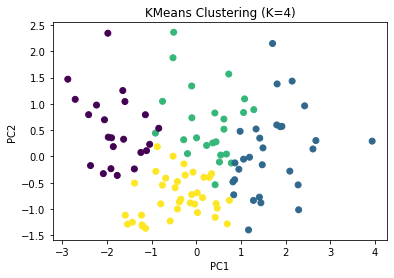

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X_norm)
kmeans.labels_

num_clusters = len(set(kmeans.labels_))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering (K={num_clusters})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

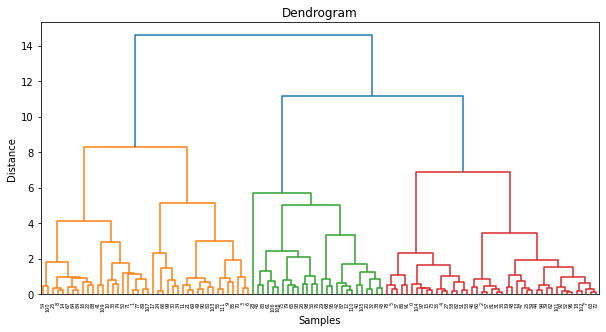

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical clustering
Z = linkage(X_norm, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Estimated number of clusters: 4


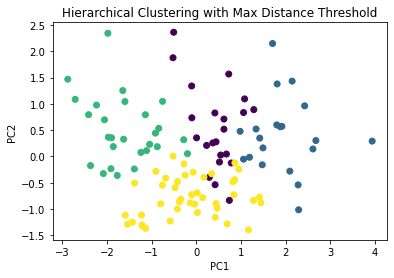

In [16]:
# Estimate number of clusters
max_d = 7.5 # Maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering with Max Distance Threshold')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

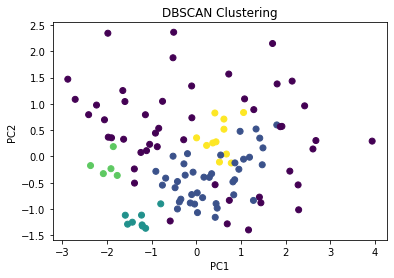

In [17]:
from sklearn.cluster import DBSCAN

# Density-based clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

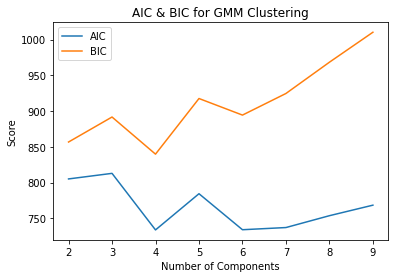

In [18]:
from sklearn.mixture import GaussianMixture

# GMM clustering with AIC and BIC
n_components = np.arange(2, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=1).fit(X_norm) for n in n_components]
plt.plot(n_components, [m.aic(X_norm) for m in models], label='AIC')
plt.plot(n_components, [m.bic(X_norm) for m in models], label='BIC')

plt.title('AIC & BIC for GMM Clustering')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc = 'best')

plt.show()

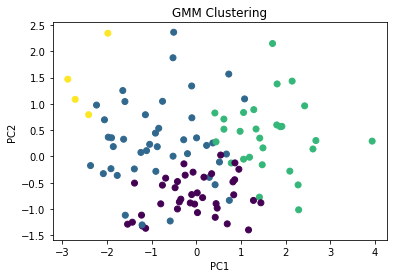

In [23]:
# GMM clustering with optimal number of clusters
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=1)
labels = gmm.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('GMM Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'dom'}>],
       [<AxesSubplot:title={'center':'spread'}>,
        <AxesSubplot:title={'center':'ldom'}>]], dtype=object)

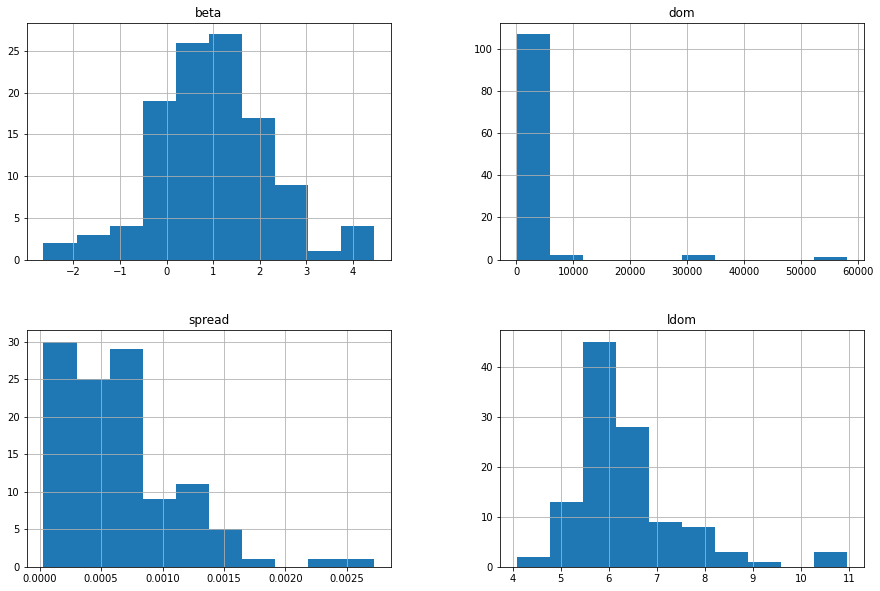

In [20]:
d = pd.read_csv("time/time_5.csv").drop("time_id",axis=1).iloc[:,2:]
d['ldom'] = np.log(d['dom'])
d.hist(figsize=(15, 10))

array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'dom'}>],
       [<AxesSubplot:title={'center':'spread'}>,
        <AxesSubplot:title={'center':'ldom'}>]], dtype=object)

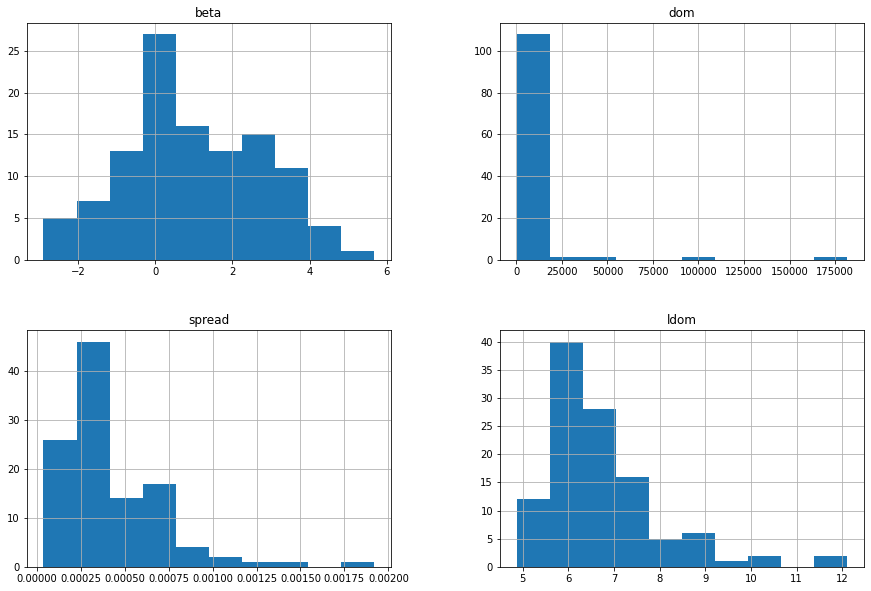

In [21]:
d = pd.read_csv("time/time_31034.csv").drop("time_id",axis=1).iloc[:,2:]
d['ldom'] = np.log(d['dom'])
d.hist(figsize=(15, 10))

array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'dom'}>],
       [<AxesSubplot:title={'center':'spread'}>,
        <AxesSubplot:title={'center':'ldom'}>]], dtype=object)

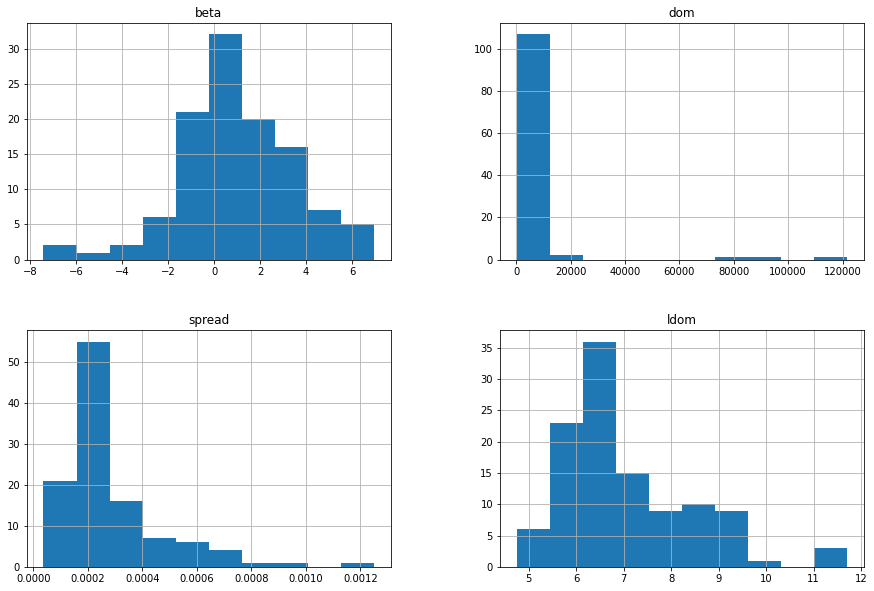

In [22]:
d = pd.read_csv("time/time_31071.csv").drop("time_id",axis=1).iloc[:,2:]
d['ldom'] = np.log(d['dom'])
d.hist(figsize=(15, 10))